In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Loading Data

In [2]:
aisles = pd.read_csv('aisles.csv')

In [3]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


In [3]:
order_products_previous = pd.read_csv('order_products__prior.csv')
order_products_train = pd.read_csv('order_products__train.csv')
aisles = pd.read_csv('aisles.csv')
products = pd.read_csv('products.csv')
departments = pd.read_csv('departments.csv')
orders = pd.read_csv('orders.csv')

In [3]:
order_products_previous.head()

NameError: name 'order_products_previous' is not defined

In [53]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [54]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [55]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [56]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [57]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Playing around with Data

In [58]:
datasets = [orders, order_products_previous , order_products_train , aisles , products , departments]

dataset_name = ['orders','order_products_previous' , 'order_products_train' , 'aisles' , 'products' , 'departments' ]

In [59]:
for i in range(len(datasets)):
    print('Data set name :',dataset_name[i])
    print('Data set shape :')
    print(datasets[i].shape)
    print('*' * 30)
    print('*' * 30)

Data set name : orders
Data set shape :
(3421083, 7)
******************************
******************************
Data set name : order_products_previous
Data set shape :
(32434489, 4)
******************************
******************************
Data set name : order_products_train
Data set shape :
(1384617, 4)
******************************
******************************
Data set name : aisles
Data set shape :
(134, 2)
******************************
******************************
Data set name : products
Data set shape :
(49688, 4)
******************************
******************************
Data set name : departments
Data set shape :
(21, 2)
******************************
******************************


In [60]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [61]:
order_products_previous.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [62]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [63]:
print('Checking for Null values in the dataset :\n')
for i in range(len(datasets)):
    print('Data set name :',dataset_name[i])
    print('Data set shape :')
    print(datasets[i].isnull().sum())
    print('*' * 30)
    print('*' * 30)

Checking for Null values in the dataset :

Data set name : orders
Data set shape :
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
******************************
******************************
Data set name : order_products_previous
Data set shape :
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
******************************
******************************
Data set name : order_products_train
Data set shape :
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64
******************************
******************************
Data set name : aisles
Data set shape :
aisle_id    0
aisle       0
dtype: int64
******************************
******************************
Data set name : product

In [64]:
print('Describing values in the dataset :\n')
for i in range(len(datasets)):
    print('Data set name :',dataset_name[i])
    print('Data set shape :')
    print(datasets[i].describe())
    print('*' * 30)
    print('*' * 30)

Describing values in the dataset :

Data set name : orders
Data set shape :
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+05  2.300000e+01  5.000000e+00   
max    3.421083e+06  2.062090e+05  1.000000e+02  6.000000e+00   

       order_hour_of_day  days_since_prior_order  
count       3.421083e+06            3.214874e+06  
mean        1.345202e+01            1.111484e+01  
std         4.226088e+00            9.206737e+00  
min         0.000000e+00            0.000000e+00  
25%         1.000000e+01            4.000000e+00  
50%         1.300000e+01        

In [65]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [66]:
orders.eval_set.value_counts()

prior    3214874
train     131209
test       75000
Name: eval_set, dtype: int64

In [67]:
order_products_previous.shape

(32434489, 4)

In [68]:
order_products_train.shape

(1384617, 4)

In [69]:
def get_unique_count(x):
    return len(np.unique(x))

orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [70]:
orders['user_id'].nunique()

206209

### Checking difference between orders and previous orders

In [71]:
check_df = orders.merge(order_products_previous, on = 'order_id', how = 'left')

In [72]:
check_df[check_df['product_id'].isnull()].eval_set.value_counts()

train    131209
test      75000
Name: eval_set, dtype: int64

### Checking skew of order count

In [73]:
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()
cnt_srs = cnt_srs.reset_index()

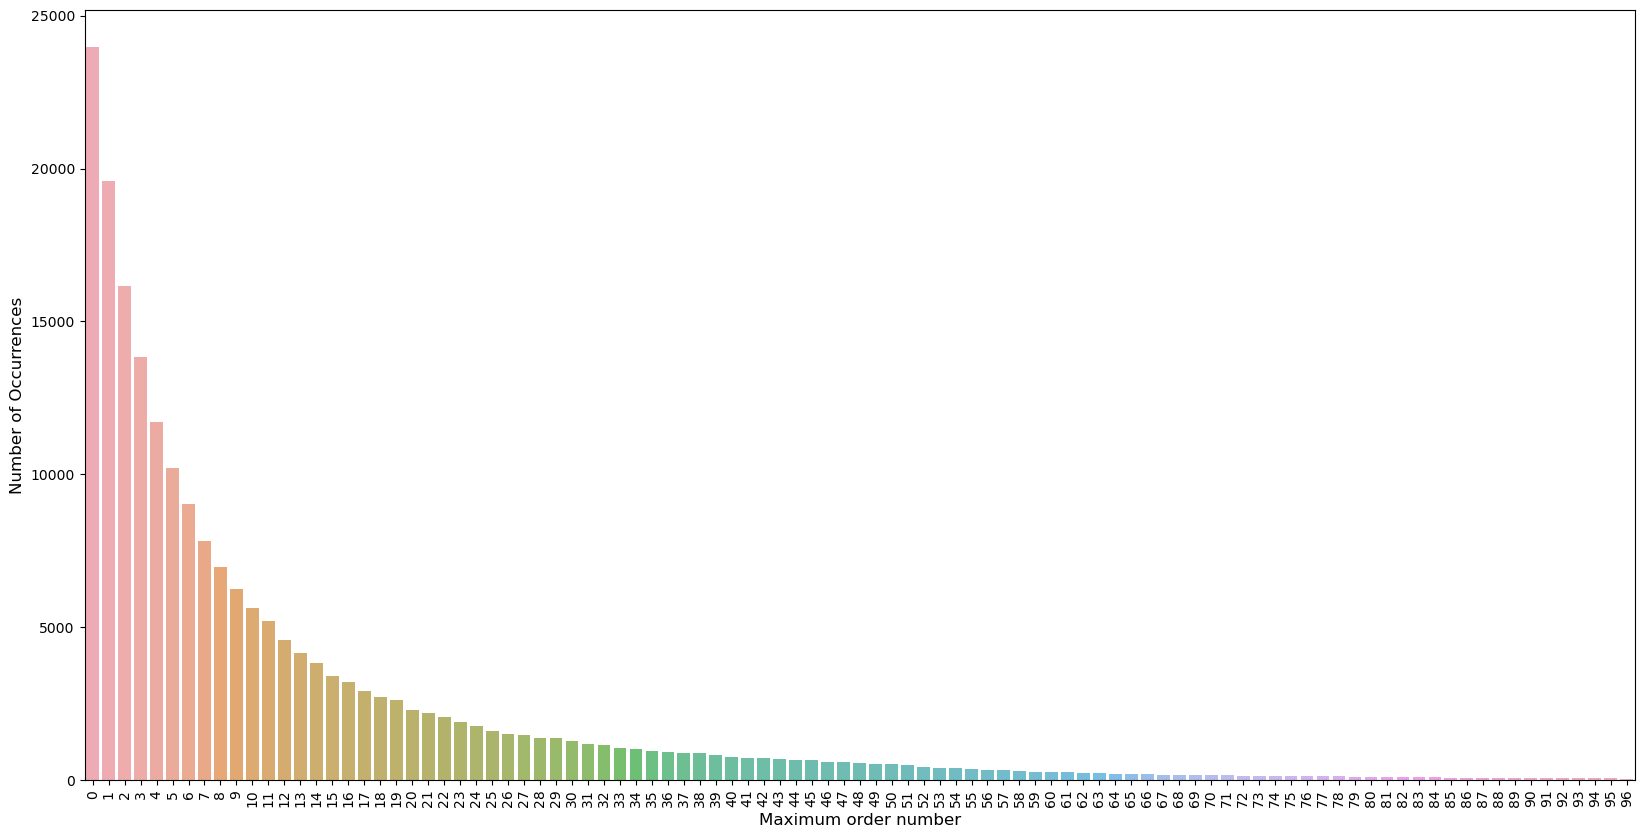

In [74]:
plt.figure(figsize=(20,10))
sns.barplot(data = cnt_srs, x=cnt_srs.index, y = cnt_srs.order_number, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation= 90)
plt.show()

### Checking frequency of order by hour of the day

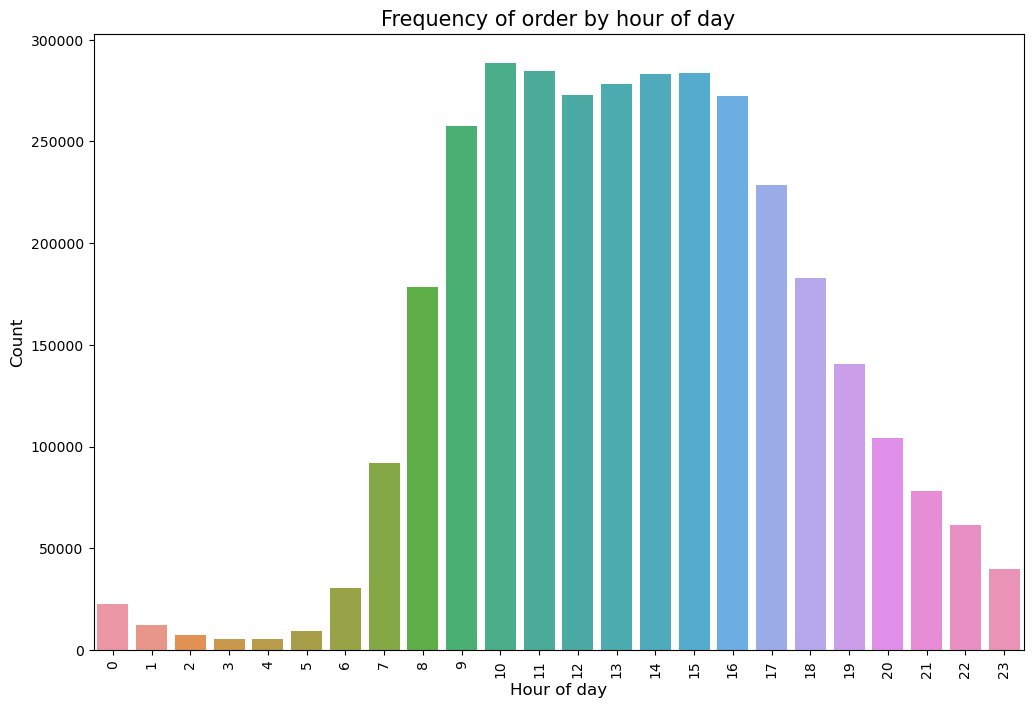

In [75]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

In [76]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [77]:
orders_by_dow_hour = orders.groupby(['order_dow','order_hour_of_day'])['order_id'].nunique().reset_index()


# Mapping from numeric day to day name
day_mapping = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}

# Apply the mapping to the 'day_of_week' column
orders_by_dow_hour['order_day_of_week'] = orders_by_dow_hour['order_dow'].map(day_mapping)


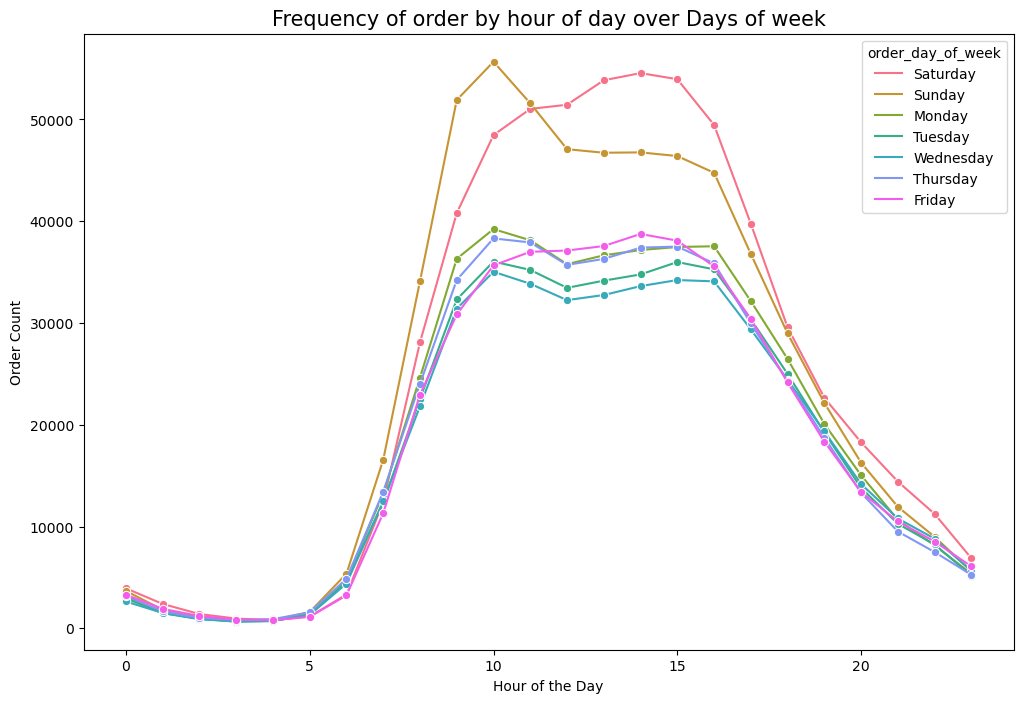

In [78]:
plt.figure(figsize=(12,8))

# Define a custom color palette
custom_palette = sns.color_palette("husl", n_colors=orders_by_dow_hour['order_dow'].nunique())

sns.lineplot(data = orders_by_dow_hour , x = 'order_hour_of_day' , y = 'order_id', hue = 'order_day_of_week',marker='o', palette=custom_palette)

# Set plot labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Order Count')
plt.title("Frequency of order by hour of day over Days of week", fontsize=15)
plt.show()

### Investigating days since prior order

In [79]:
# checking % of missing values 

(orders.isnull().sum()[-1]/orders.shape[0])*100

6.027594185817766

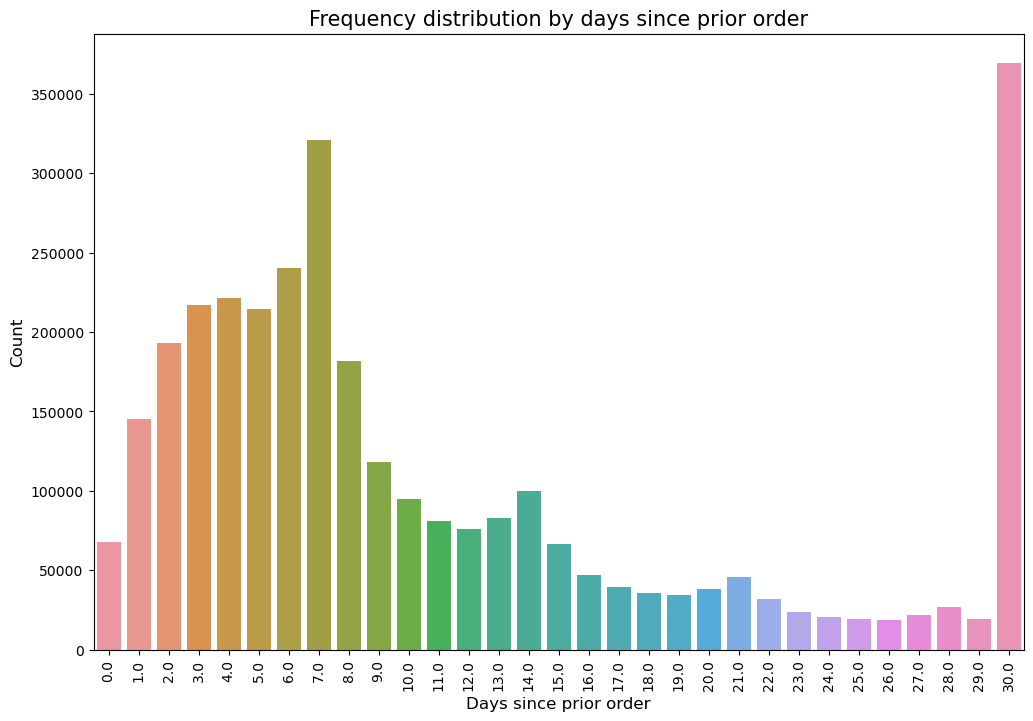

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [81]:
order_products_previous.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [83]:
# percentage of re-orders in prior set #
(order_products_previous.reordered.sum() / order_products_previous.shape[0])

0.5896974667922161

In [84]:
# percentage of re-orders in prior set #
order_products_previous.reordered.sum() / order_products_previous.shape[0]

0.5896974667922161

In [85]:
# percentage of re-orders in train set #
order_products_train.reordered.sum() / order_products_train.shape[0]

0.5985944127509629

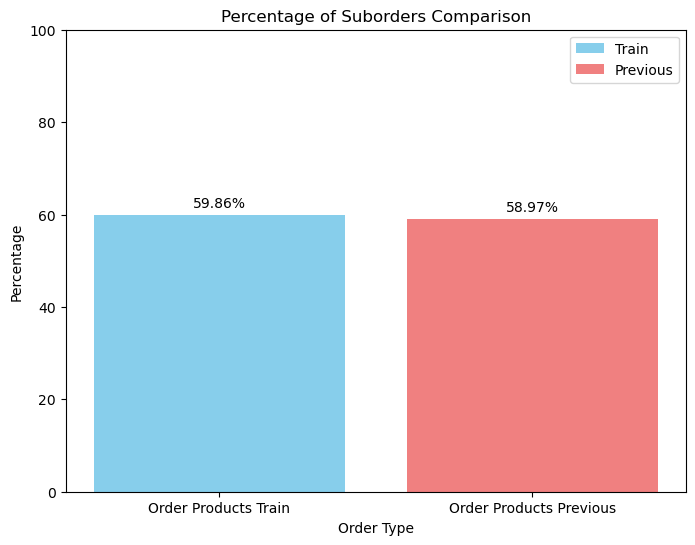

In [86]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage of suborders with respect to total orders
percentage_suborders_train = (order_products_train.reordered.sum() / order_products_train.shape[0]) * 100
percentage_suborders_previous = (order_products_previous.reordered.sum() / order_products_previous.shape[0]) * 100

# Plot a bar graph for both datasets on the same axis
plt.figure(figsize=(8, 6))

# Plot for order_products_train
plt.bar(['Order Products Train'], [percentage_suborders_train], color='skyblue', label='Train')

# Plot for order_products_previous
plt.bar(['Order Products Previous'], [percentage_suborders_previous], color='lightcoral', label='Previous')

# Annotate values on top of the bars
plt.text('Order Products Train', percentage_suborders_train + 1, f'{percentage_suborders_train:.2f}%', ha='center', va='bottom', color='black', fontsize=10)
plt.text('Order Products Previous', percentage_suborders_previous + 1, f'{percentage_suborders_previous:.2f}%', ha='center', va='bottom', color='black', fontsize=10)

# Set plot labels and title
plt.xlabel('Order Type')
plt.ylabel('Percentage')
plt.title('Percentage of Suborders Comparison')
plt.ylim(0, 100)

# Add legend for better distinction
plt.legend()

# Display the combined plot
plt.show()


#### Checking for number of items in a order

In [87]:
grouped_df = order_products_train.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_order_tot = grouped_df.add_to_cart_order.value_counts()
cnt_order_tot = cnt_order_tot.reset_index()
cnt_order_tot.columns = ['Item Value' ,'Total Orders']

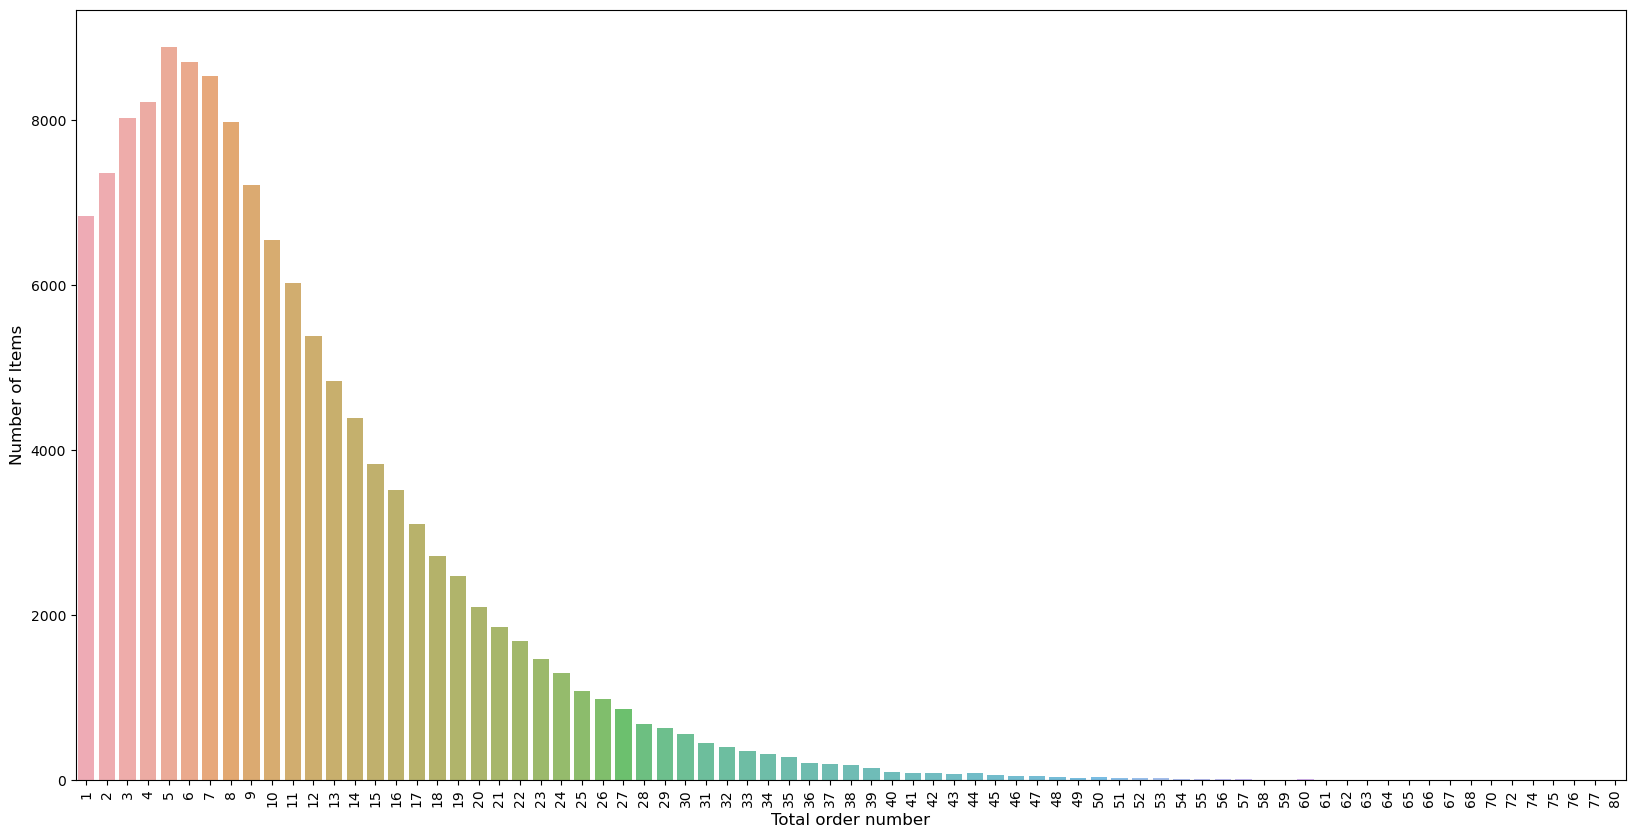

In [88]:
plt.figure(figsize=(20,10))
sns.barplot(data = cnt_order_tot, x=cnt_order_tot['Item Value'], y = cnt_order_tot['Total Orders'], alpha=0.8)
plt.ylabel('Number of Items', fontsize=12)
plt.xlabel('Total order number', fontsize=12)
plt.xticks(rotation= 90)
plt.show()

# Merging all the tables togther

In [92]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [93]:
order_products_previous.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [18]:
order_products_all = order_products_previous.append(order_products_train, ignore_index = True)

/var/folders/f3/hq7n6w7d59n_lkymzcwnbnhc0000gn/T/ipykernel_38424/2779540760.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_products_all = order_products_previous.append(order_products_train, ignore_index = True)


In [24]:
cust_order = orders[['order_id','user_id']]

In [28]:
cust_order.head()

,order_id,user_id
0,2539329,1
1,2398795,1
2,473747,1
3,2254736,1
4,431534,1


In [30]:
order_products_prior_df = pd.merge(order_products_all, products, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments, on='department_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df,cust_order, on='order_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279


In [91]:
order_products_prior_df.to_csv('order_products_prior_df.csv')

In [2]:
cnt_product_type = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_product_type.columns = ['product_name', 'frequency_count']
cnt_product_type

NameError: name 'order_products_prior_df' is not defined

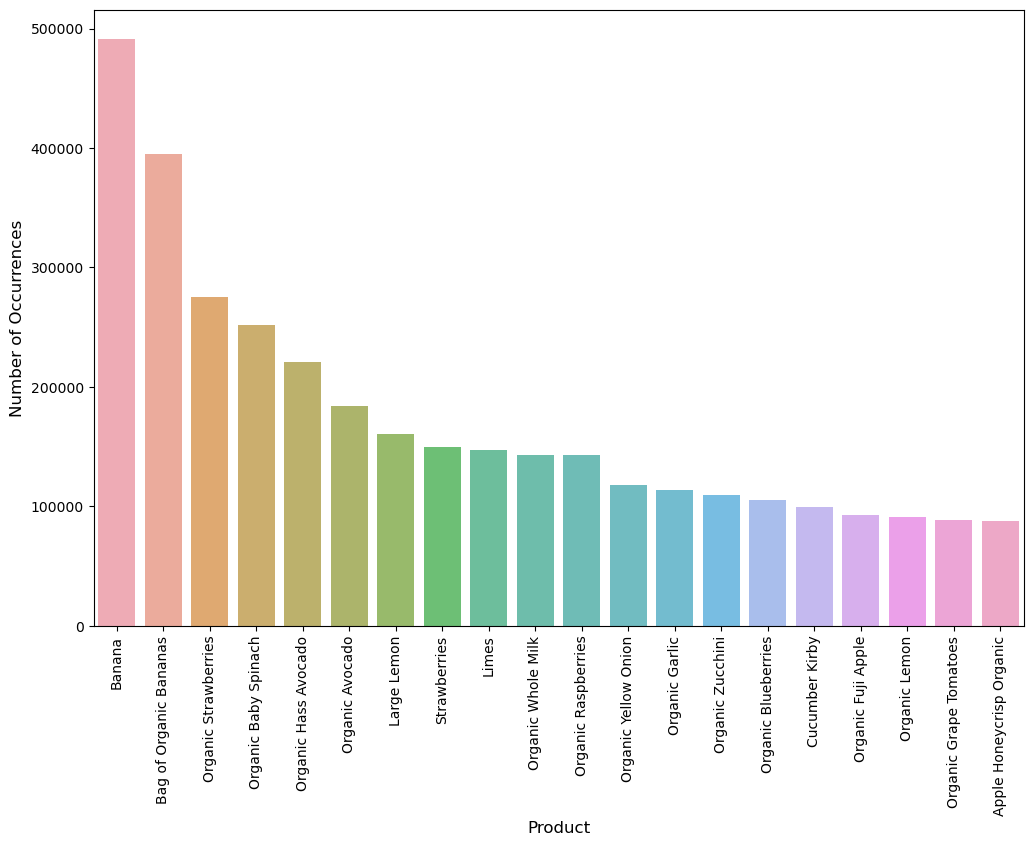

In [100]:
plt.figure(figsize=(12,8))
sns.barplot(data = cnt_product_type , x = cnt_product_type['product_name'], y = cnt_product_type['frequency_count'], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Product', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
cnt_aisle_type = order_products_prior_df['aisle'].value_counts().reset_index().head(20)
cnt_aisle_type.columns = ['aisle_name', 'frequency_count']
cnt_aisle_type

,aisle_name,frequency_count
0,fresh fruits,3792661
1,fresh vegetables,3568630
2,packaged vegetables fruits,1843806
3,yogurt,1507583
4,packaged cheese,1021462
5,milk,923659
6,water seltzer sparkling water,878150
7,chips pretzels,753739
8,soy lactosefree,664493
9,bread,608469


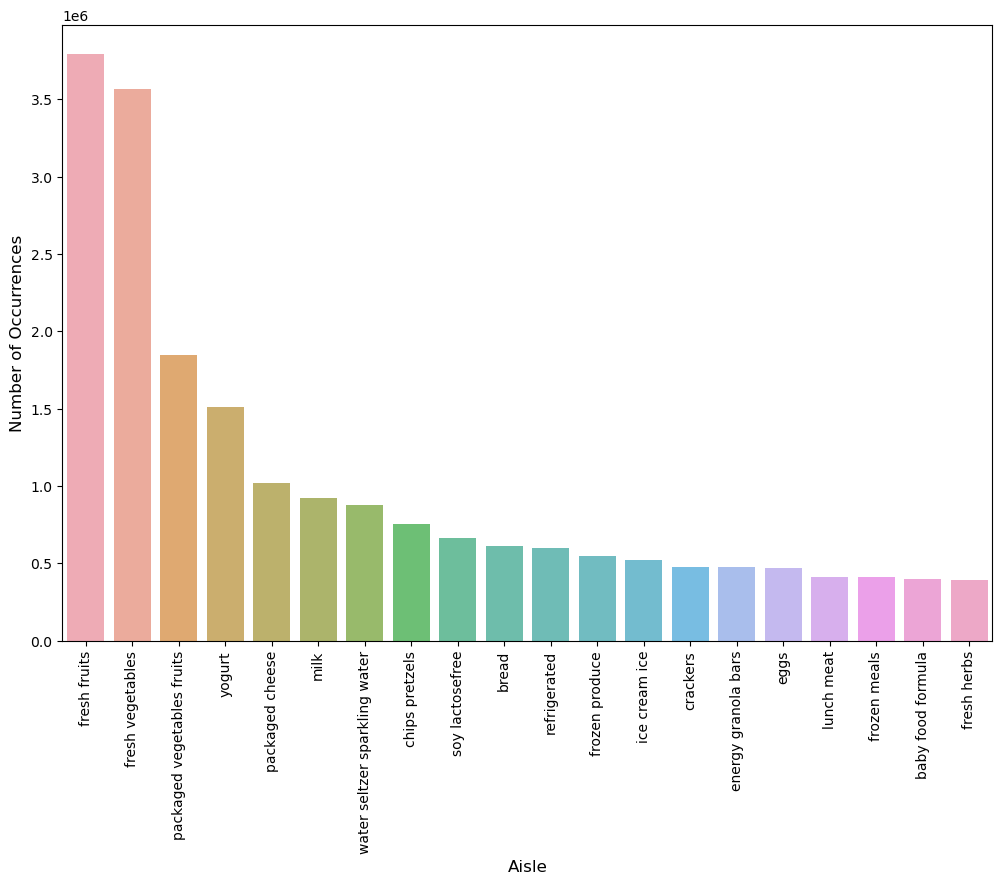

In [102]:
plt.figure(figsize=(12,8))
sns.barplot(data = cnt_aisle_type , x = cnt_aisle_type['aisle_name'], y = cnt_aisle_type['frequency_count'], alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

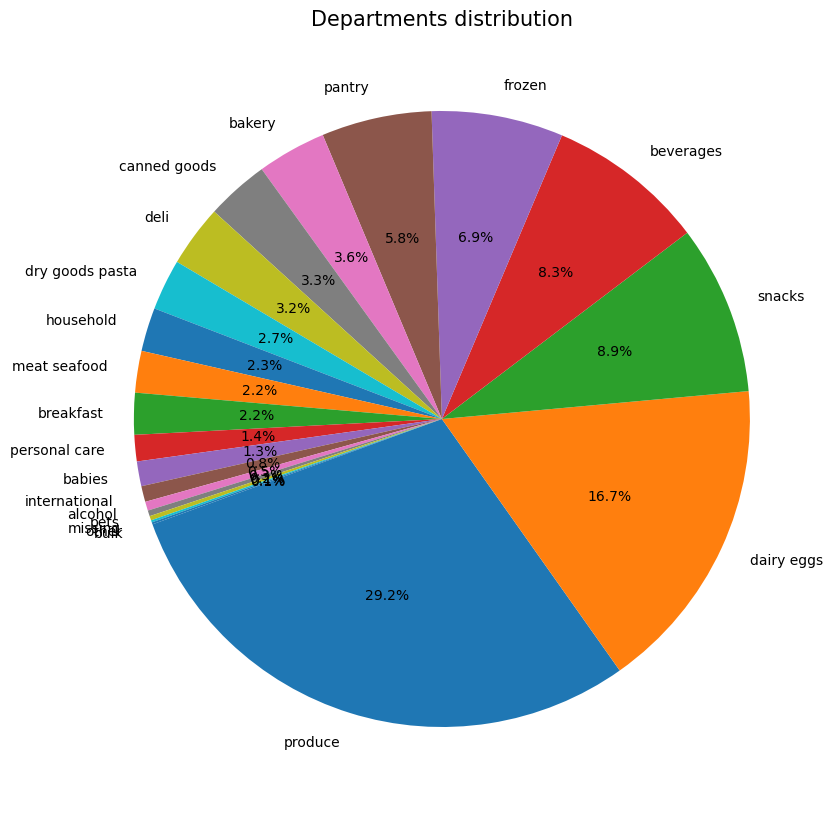

In [103]:
plt.figure(figsize=(20,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

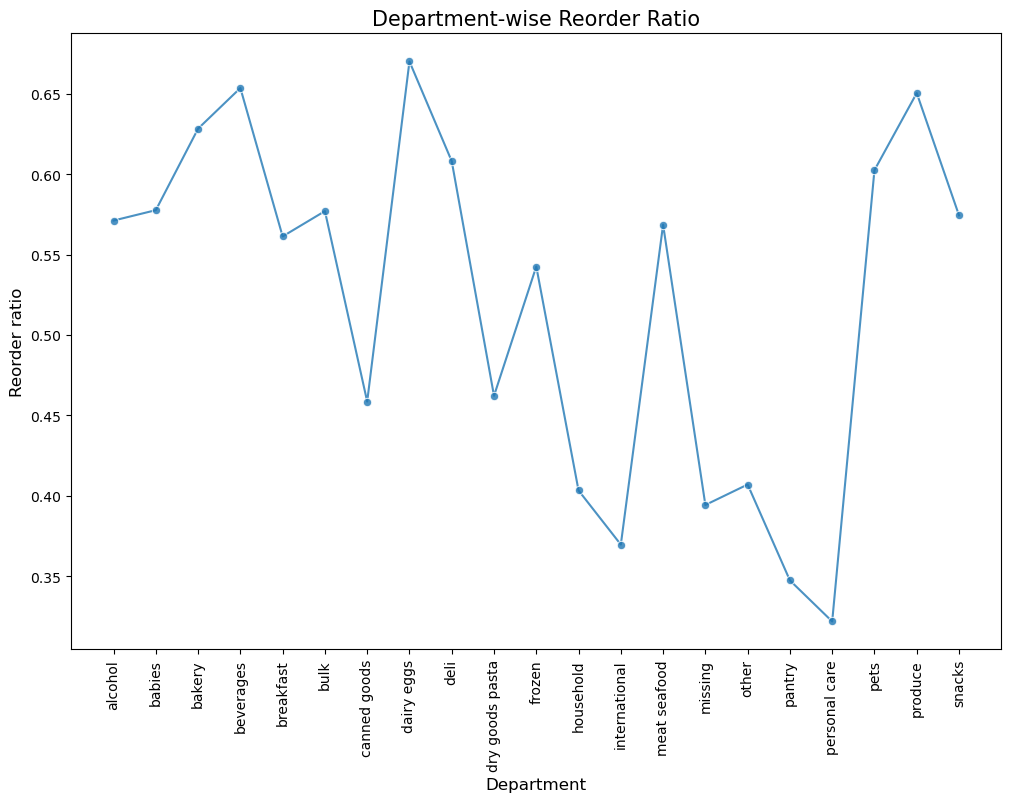

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped_df = order_products_prior_df.groupby(["department"])["reordered"].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='department', y='reordered', data=grouped_df, alpha=0.8 , marker = 'o')
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department-wise Reorder Ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()


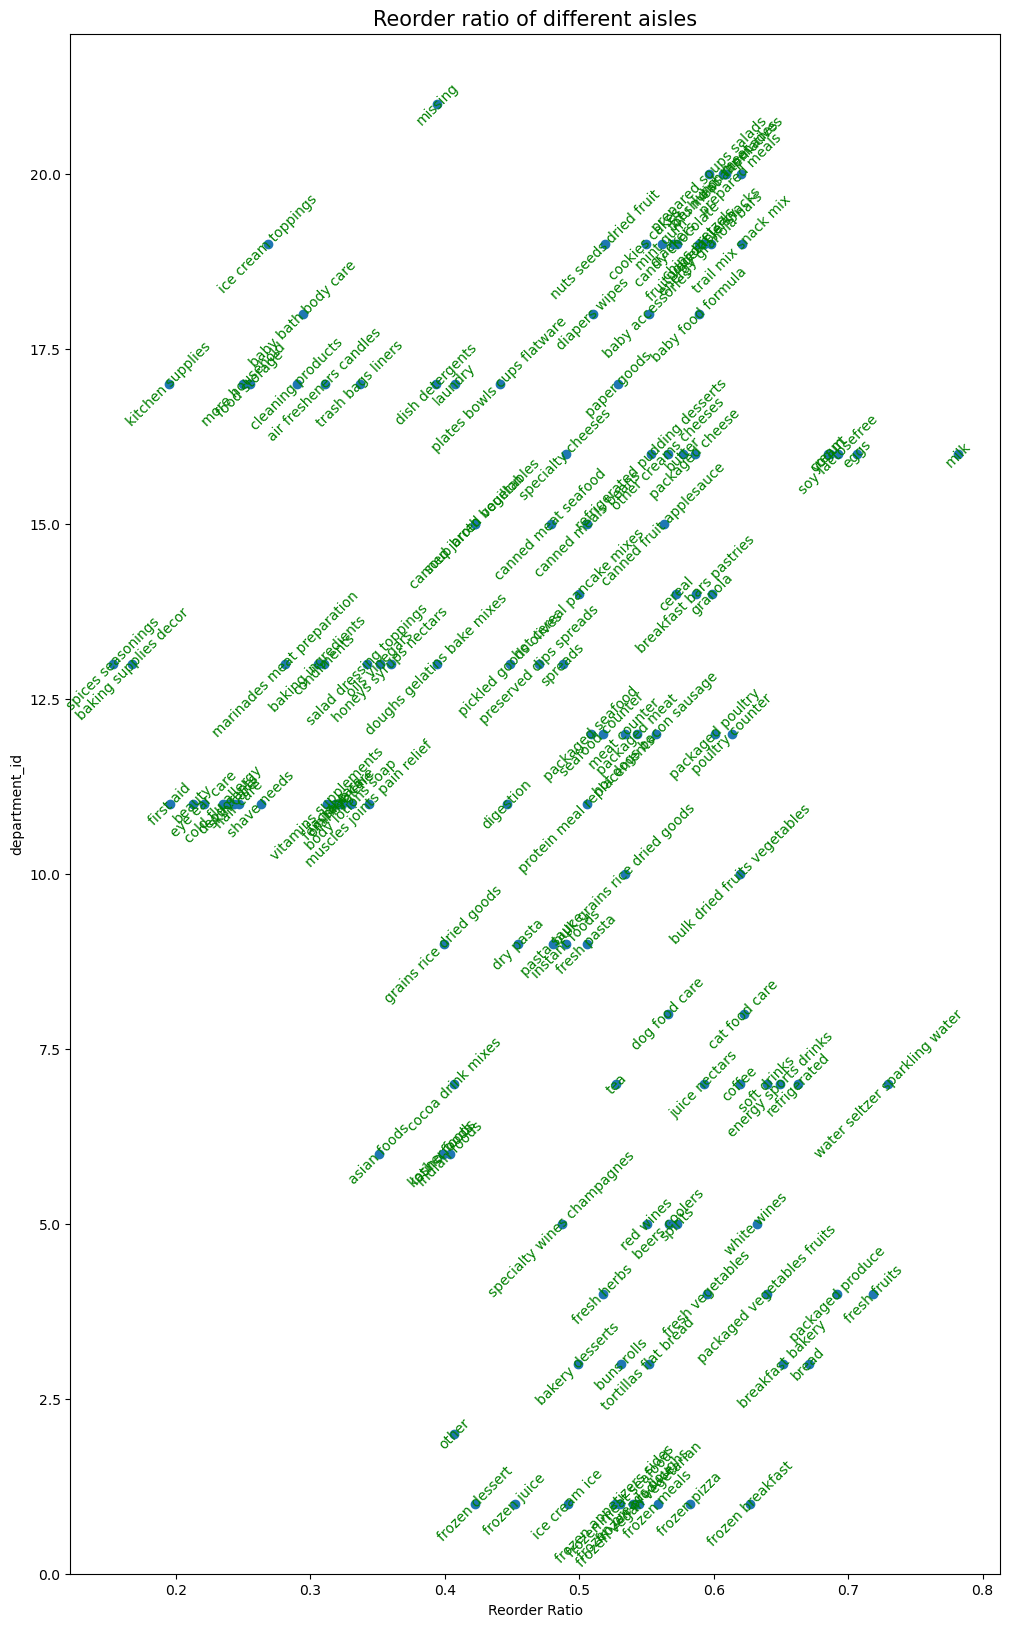

In [105]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

# Association Rule Mining

In [106]:
# Function that returns the size of an object in MB
def size(obj):
    return "{0:.2f} MB".format(sys.getsizeof(obj) / (1000 * 1000))

In [107]:
orders = pd.read_csv('order_products__prior.csv')
print('orders -- dimensions: {0};   size: {1}'.format(orders.shape, size(orders)))
display(orders.head())

orders -- dimensions: (32434489, 4);   size: 1037.90 MB


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [1]:
# Convert from DataFrame to a Series, with order_id as index and item_id as value
orders = orders.set_index('order_id')['product_id'].rename('item_id')
display(orders.head(10))
type(orders)


NameError: name 'orders' is not defined

In [109]:
print('dimensions: {0};   size: {1};   unique_orders: {2};   unique_items: {3}'
      .format(orders.shape, size(orders), len(orders.index.unique()), len(orders.value_counts())))

dimensions: (32434489,);   size: 518.95 MB;   unique_orders: 3214874;   unique_items: 49677


# Part 2: Association Rules Function

In [110]:
# Returns frequency counts for items and item pairs
def freq(iterable):
    if type(iterable) == pd.core.series.Series:
        return iterable.value_counts().rename("freq")
    else: 
        return pd.Series(Counter(iterable)).rename("freq")

    
# Returns number of unique orders
def order_count(order_item):
    return len(set(order_item.index))


# Returns generator that yields item pairs, one at a time
def get_item_pairs(order_item):
    order_item = order_item.reset_index().values
    for order_id, order_object in groupby(order_item, lambda x: x[0]):
        item_list = [item[1] for item in order_object]
              
        for item_pair in combinations(item_list, 2):
            yield item_pair
            

# Returns frequency and support associated with item
def merge_item_stats(item_pairs, item_stats):
    return (item_pairs
                .merge(item_stats.rename(columns={'freq': 'freqA', 'support': 'supportA'}), left_on='item_A', right_index=True)
                .merge(item_stats.rename(columns={'freq': 'freqB', 'support': 'supportB'}), left_on='item_B', right_index=True))


# Returns name associated with item
def merge_item_name(rules, item_name):
    columns = ['itemA','itemB','freqAB','supportAB','freqA','supportA','freqB','supportB', 
               'confidenceAtoB','confidenceBtoA','lift']
    rules = (rules
                .merge(item_name.rename(columns={'item_name': 'itemA'}), left_on='item_A', right_on='item_id')
                .merge(item_name.rename(columns={'item_name': 'itemB'}), left_on='item_B', right_on='item_id'))
    return rules[columns] 

In [111]:
from itertools import combinations, groupby
from collections import Counter

In [112]:
def association_rules(order_item, min_support):

    print("Starting order_item: {:22d}".format(len(order_item)))


    # Calculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Filter from order_item items below min support 
    qualifying_items       = item_stats[item_stats['support'] >= min_support].index
    order_item             = order_item[order_item.isin(qualifying_items)]

    print("Items with support >= {}: {:15d}".format(min_support, len(qualifying_items)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Filter from order_item orders with less than 2 items
    order_size             = freq(order_item.index)
    qualifying_orders      = order_size[order_size >= 2].index
    order_item             = order_item[order_item.index.isin(qualifying_orders)]

    print("Remaining orders with 2+ items: {:11d}".format(len(qualifying_orders)))
    print("Remaining order_item: {:21d}".format(len(order_item)))


    # Recalculate item frequency and support
    item_stats             = freq(order_item).to_frame("freq")
    item_stats['support']  = item_stats['freq'] / order_count(order_item) * 100


    # Get item pairs generator
    item_pair_gen          = get_item_pairs(order_item)


    # Calculate item pair frequency and support
    item_pairs              = freq(item_pair_gen).to_frame("freqAB")
    item_pairs['supportAB'] = item_pairs['freqAB'] / len(qualifying_orders) * 100

    print("Item pairs: {:31d}".format(len(item_pairs)))


    # Filter from item_pairs those below min support
    item_pairs              = item_pairs[item_pairs['supportAB'] >= min_support]

    print("Item pairs with support >= {}: {:10d}\n".format(min_support, len(item_pairs)))


    # Create table of association rules and compute relevant metrics
    item_pairs = item_pairs.reset_index().rename(columns={'level_0': 'item_A', 'level_1': 'item_B'})
    item_pairs = merge_item_stats(item_pairs, item_stats)
    
    item_pairs['confidenceAtoB'] = item_pairs['supportAB'] / item_pairs['supportA']
    item_pairs['confidenceBtoA'] = item_pairs['supportAB'] / item_pairs['supportB']
    item_pairs['lift']           = item_pairs['supportAB'] / (item_pairs['supportA'] * item_pairs['supportB'])
    
    
    # Return association rules sorted by lift in descending order
    return item_pairs.sort_values('lift', ascending=False)

In [113]:
%%time
rules = association_rules(orders, 0.01)  

Starting order_item:               32434489
Items with support >= 0.01:           10906
Remaining order_item:              29843570
Remaining orders with 2+ items:     3013325
Remaining order_item:              29662716
Item pairs:                        30622410
Item pairs with support >= 0.01:      48751

CPU times: user 6min 45s, sys: 19min 57s, total: 26min 43s
Wall time: 50min 44s


In [114]:
# Replace item ID with item name and display association rules
item_name   = pd.read_csv('products.csv')
item_name   = item_name.rename(columns={'product_id':'item_id', 'product_name':'item_name'})
rules_final = merge_item_name(rules, item_name).sort_values('lift', ascending=False)
display(rules_final)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306,0.010155,1163,0.038595,839,0.027843,0.263113,0.364720,9.449868
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318,0.010553,1809,0.060033,879,0.029170,0.175788,0.361775,6.026229
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,349,0.011582,1518,0.050376,1249,0.041449,0.229908,0.279424,5.546732
9,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409,0.013573,1666,0.055288,1391,0.046162,0.245498,0.294033,5.318230
10,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,351,0.011648,1731,0.057445,1149,0.038131,0.202773,0.305483,5.317849
...,...,...,...,...,...,...,...,...,...,...,...
7271,Organic Strawberries,Strawberries,640,0.021239,263416,8.741706,141805,4.705931,0.002430,0.004513,0.000516
6763,Organic Hass Avocado,Organic Avocado,464,0.015398,212785,7.061469,176241,5.848722,0.002181,0.002633,0.000373
4387,Organic Avocado,Organic Hass Avocado,443,0.014701,176241,5.848722,212785,7.061469,0.002514,0.002082,0.000356
2596,Banana,Bag of Organic Bananas,654,0.021704,470096,15.600574,376367,12.490090,0.001391,0.001738,0.000111


In [37]:
rules_final.to_csv('rules_final_all.csv')

In [116]:
rules_final[rules_final['lift'] > 1.1].shape

(185, 11)

In [41]:
rules_final[rules_final['lift'] > 1.1].to_excel('apriori_lift_market_basket.xlsx')

In [45]:
rules_final.head(60)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
0,Organic Strawberry Chia Lowfat 2% Cottage Cheese,Organic Cottage Cheese Blueberry Acai Chia,306,0.010155,1163,0.038595,839,0.027843,0.263113,0.364720,9.449868
1,Grain Free Chicken Formula Cat Food,Grain Free Turkey Formula Cat Food,318,0.010553,1809,0.060033,879,0.029170,0.175788,0.361775,6.026229
3,Organic Fruit Yogurt Smoothie Mixed Berry,Apple Blueberry Fruit Yogurt Smoothie,349,0.011582,1518,0.050376,1249,0.041449,0.229908,0.279424,5.546732
9,Nonfat Strawberry With Fruit On The Bottom Gre...,"0% Greek, Blueberry on the Bottom Yogurt",409,0.013573,1666,0.055288,1391,0.046162,0.245498,0.294033,5.318230
10,Organic Grapefruit Ginger Sparkling Yerba Mate,Cranberry Pomegranate Sparkling Yerba Mate,351,0.011648,1731,0.057445,1149,0.038131,0.202773,0.305483,5.317849
11,Baby Food Pouch - Roasted Carrot Spinach & Beans,"Baby Food Pouch - Butternut Squash, Carrot & C...",332,0.011018,1503,0.049878,1290,0.042810,0.220892,0.257364,5.159830
12,Unsweetened Whole Milk Mixed Berry Greek Yogurt,Unsweetened Whole Milk Blueberry Greek Yogurt,438,0.014535,1622,0.053828,1621,0.053794,0.270037,0.270204,5.019798
23,Uncured Cracked Pepper Beef,Chipotle Beef & Pork Realstick,410,0.013606,1839,0.061029,1370,0.045465,0.222947,0.299270,4.903741
24,Organic Mango Yogurt,Organic Whole Milk Washington Black Cherry Yogurt,334,0.011084,1675,0.055586,1390,0.046128,0.199403,0.240288,4.322777
2,Grain Free Chicken Formula Cat Food,Grain Free Turkey & Salmon Formula Cat Food,391,0.012976,1809,0.060033,1553,0.051538,0.216142,0.251771,4.193848


In [47]:
rules_final[rules_final['lift'] > 1.1].tail(60)

,itemA,itemB,freqAB,supportAB,freqA,supportA,freqB,supportB,confidenceAtoB,confidenceBtoA,lift
5115,VitaminWater Zero™ XXX Acai Blueberry Pomegranate,Zero Vitamin Water,316,0.010487,3337,0.110741,1855,0.061560,0.094696,0.170350,1.538271
4824,"Organic Pears, Peas and Broccoli Puree Stage 1",Organic 4 Months Butternut Squash Carrots Appl...,812,0.026947,5029,0.166892,3237,0.107423,0.161464,0.250850,1.503065
110,Cream Top Strawberry on the Bottom Yogurt,Cherry Vanilla Cherry On The Bottom Cream Top,310,0.010288,3452,0.114558,1802,0.059801,0.089803,0.172031,1.501696
5123,Caramel Almond and Sea Salt Nut Bar,Maple Glazed Pecan & Sea Salt Bar,329,0.010918,3611,0.119834,1852,0.061460,0.091110,0.177646,1.482427
4817,"Organic Pears, Peas and Broccoli Puree Stage 1","Organic Apples, Carrots and Parsnips Puree",628,0.020841,5029,0.166892,2568,0.085221,0.124876,0.244548,1.465308
2196,Organic Blended Raspberry Whole Milk Greek Yogurt,Organic Greek Whole Milk Blended Strawberry Yo...,529,0.017555,2598,0.086217,4198,0.139315,0.203618,0.126012,1.461571
5125,Sunny Days Strawberry Snack Bars,Organic Sunny Days Apple Snack Bars,341,0.011316,2881,0.095609,2450,0.081306,0.118362,0.139184,1.455764
4791,"Sweeet Potato, Apple, Carrot & Cinnamon Organi...",Organic Apple & Butternut Squash Baby Food,318,0.010553,3445,0.114326,1912,0.063452,0.092308,0.166318,1.454776
5137,Plus Cranberry Almond + Antioxidants with Maca...,Almond & Apricot Bar,307,0.010188,3131,0.103905,2031,0.067401,0.098052,0.151157,1.454760
4825,"Organic Apples, Carrots and Parsnips Puree",Organic 4 Months Butternut Squash Carrots Appl...,401,0.013308,2568,0.085221,3237,0.107423,0.156153,0.123880,1.453626


From the output above, we see that the top associations are not surprising, with one flavor of an item being purchased with another flavor from the same item family (eg: Strawberry Chia Cottage Cheese with Blueberry Acai Cottage Cheese, Chicken Cat Food with Turkey Cat Food, etc). As mentioned, one common application of association rules mining is in the domain of recommender systems. Once item pairs have been identified as having positive relationship, recommendations can be made to customers in order to increase sales. And hopefully, along the way, also introduce customers to items they never would have tried before or even imagined existed!

In [4]:
tst = pd.read_csv('user_cluster.csv')

In [31]:
tst.head()

,user_id,cluster,cluster_type
0,1,1,1
1,2,1,1
2,3,1,1
3,4,1,1
4,5,1,1


In [32]:
tst.cluster.value_counts()

1    164798
0     32445
2      6964
Name: cluster, dtype: int64

In [33]:
cluster_mapping = {0: 0, 1: 1, 2: 1} 
tst['cluster_type'] = tst['cluster'].map(cluster_mapping)

In [34]:
tst.cluster_type.value_counts()

1    171762
0     32445
Name: cluster_type, dtype: int64

In [35]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279


In [36]:
orders_product_all = order_products_prior_df.merge(tst, on = 'user_id', how = 'left')

In [37]:
orders_product_all.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,cluster,cluster_type
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,1.0,1.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,1.0,1.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,1.0,1.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,1.0,1.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,1.0,1.0


In [46]:
orders_product_all[['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'aisle', 'department',
       'user_id', 'cluster_type']].to_csv('order_product_all.csv')

In [43]:
orders_product_all

1564244    145
790903     137
61355      127
2970392    121
2069920    116
          ... 
2738386      1
2934513      1
1508880      1
2431839      1
727076       1
Name: order_id, Length: 3346083, dtype: int64

In [17]:
orders_product_all.eval_set.value_counts()

prior    32434489
train      131209
test        75000
Name: eval_set, dtype: int64

In [159]:
orders_product_all = orders_product_all.merge(order_products_train, on = 'order_id', how = 'left')

In [153]:
order_summary = orders_product_all.merge(tst, on = 'user_id')

In [142]:
order_summary = order_summary[order_summary.eval_set !=  'test']

In [154]:
order_summary.head()

,order_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id_x,add_to_cart_order_x,reordered_x,product_id_y,add_to_cart_order_y,reordered_y,user_id,cluster,cluster_type


In [152]:
order_summary.shape

(0, 15)

In [144]:
order_products_all.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
